In [11]:
import pandas as pd
import numpy as np
from plotnine import * 
from pandas.api.types import CategoricalDtype

#### a. 单数据系列条形图

In [18]:
df = pd.read_csv('StackedBar_Data.csv')
df.shape, df.head()

((8, 5),
    Country  Pensions  Income  Health   Other services
 0   France        14       5        9               3
 1   Sweden         8       6        7               8
 2    Italy        15       4        7               1
 3  Germany        11       5        8               3
 4    Spain         9       7        7               2)

In [19]:
df.sort_values(by='Pensions', ascending=True, inplace=True)

In [20]:
cat_dtype = CategoricalDtype(categories=df['Country'], ordered=True)
df['Country'] = df['Country'].astype(cat_dtype)

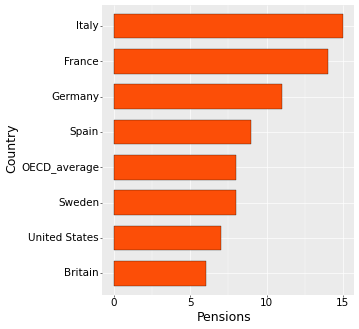

In [22]:
p1 = (ggplot(df, aes(x='Country', y='Pensions'))
      + geom_bar(width=0.7, stat='identity', color='black', fill='#FC4E07', size=0.25)
      + coord_flip()
      + theme(axis_title=element_text(color='black', size=18, face='plain'),
             axis_text=element_text(color='black', size=15, face='plain'),
             legend_title=element_text(color='black', size=15, face='plain'),
             aspect_ratio=1.15,
             figure_size=(6.5, 6.5),
             dpi=50)
     )
print(p1)

#### b. 多数据系列数据条

In [31]:
df1 = pd.read_csv('Stackedbar_Data.csv', usecols=['Country', 'Pensions', 'Income'])
df1

,Country,Pensions,Income
0,France,14,5
1,Sweden,8,6
2,Italy,15,4
3,Germany,11,5
4,Spain,9,7
5,Britain,6,6
6,OECD_average,8,5
7,United States,7,3


In [32]:
df1.sort_values(by='Pensions', ascending=True, inplace=True)
df1 = df1.melt(id_vars='Country')
df1.head()

,Country,variable,value
0,Britain,Pensions,6
1,United States,Pensions,7
2,Sweden,Pensions,8
3,OECD_average,Pensions,8
4,Spain,Pensions,9


In [33]:
cat_dtype = CategoricalDtype(categories=df1['Country'].unique(), ordered=True)
df1['Country'] = df1['Country'].astype(cat_dtype)

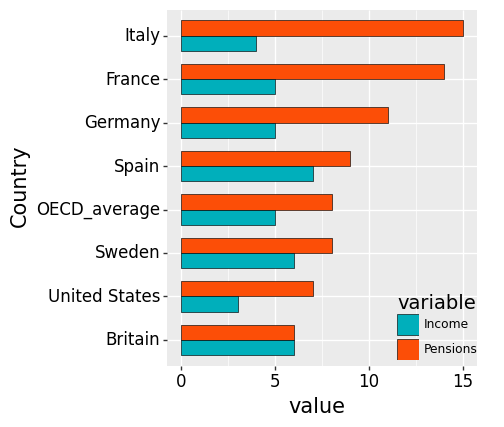

In [43]:
p2 = (ggplot(df1, aes(x='Country', y='value', fill='variable'))
      + geom_bar(width=0.7, color='black', size=0.25, stat='identity', position=position_dodge())
      + scale_fill_manual(values=["#00AFBB", "#FC4E07"])
      + coord_flip()
      + theme(axis_title=element_text(color='black', size=15, face='plain'),
             axis_text=element_text(color='black', size=12, face='plain'),
             legend_title=element_text(color='black', size=14, face='plain'),
#              legend_text=element_text(color='black', size=16, face='plain'),
             legend_position=(0.8, 0.2),
             legend_direction='vertical',
             legend_background=element_blank(),
             aspect_ratio=1.15,
             dpi=100,
             figure_size=(4, 4))
     )
print(p2)